## Исследование данных о российском кинопрокате



Перед нами поставлена задача изучить рынок российского кинопроката и провести аналитическое исследование. Мы получили данные о прокатных удостоверениях, сборах и государственной поддержке фильмов, опубликованные на портале Министерства культуры, а также информацию с КиноПоиска о жанрах, режиссерах, продюссерах и т.д..

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
data1 = pd.read_csv("/datasets/mkrf_movies.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Блок загрузки библиотек лучше размещать в отдельной от остального кода ячейке. Такой подход позволит улучшить читаемость кода, снизит время поиска ошибок (есть они есть) и исключит повторное выполнение кода. </div>

In [3]:
data2 = pd.read_csv("/datasets/mkrf_shows.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [4]:
data2["puNumber"] = data2["puNumber"].astype("str")

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [6]:
data = data1.merge(data2, how="left", on="puNumber")

In [7]:
display(data1.shape)
display(data2.shape)
display(data.shape)

(7486, 15)

(3158, 2)

(7486, 16)

Посмотрел 2 датафрема и нашел у них ообщую таблицу puNumber, но сначала нам нужно привети эту общую таблицу к одному типу данных у обоих датафремов, у одной int у другой object,  пытался методом astype перевести object в int(не получилось так как там присуствуют строковые данные), поэтому пришлось int в object переводить.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [8]:
data.dtypes

title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

In [9]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [10]:
data['ratings'] = data['ratings'].str.replace('%','').astype("float")
data.loc[data['ratings']>10.1,'ratings']=data['ratings']/10


In [11]:
data['puNumber'].unique()

array(['221048915', '111013716', '221038416', ..., '124010819',
       '124010619', '124010719'], dtype=object)

In [12]:
data['puNumber'] = data['puNumber'].replace('нет','0').astype("int")


In [13]:
data['show_start_date']=pd.to_datetime(data['show_start_date'],format='%Y-%m-%d')

In [14]:
data['show_start_date']

0      2015-11-27 12:00:00+00:00
1      2016-09-13 12:00:00+00:00
2      2016-10-10 12:00:00+00:00
3      2016-06-10 12:00:00+00:00
4      2015-07-29 12:00:00+00:00
                  ...           
7481   2019-12-23 12:00:00+00:00
7482   2019-12-24 12:00:00+00:00
7483   2019-12-28 12:00:00+00:00
7484   2019-12-30 12:00:00+00:00
7485   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7486, dtype: datetime64[ns, UTC]

In [15]:
data.dtypes

title                                 object
puNumber                               int64
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
dtype: object

Столбцы:'puNumber' поменял с object на int и 'ratings поменял с object на float . Тип данных столбца 'show_start_date' изменен на datetime для удобства дальшей работы со временем

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [16]:
data.isna().mean().sort_values(ascending=False) # Процент пропущенных значений по столбцам.

refundable_support       0.955651
nonrefundable_support    0.955651
budget                   0.955651
financing_source         0.955651
box_office               0.578146
genres                   0.130377
ratings                  0.129174
producer                 0.075875
film_studio              0.002404
director                 0.001202
production_country       0.000267
title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
age_restriction          0.000000
dtype: float64

In [17]:
data=data.dropna(subset=['production_country',  "film_studio"]) # Решил удалить строки с пропущенными значениями, так как пропусков меньше 5 %, что несущественно и роли нам не сыграет.

In [18]:
data["ratings"]=data["ratings"].fillna(0)

In [19]:
data["genres"]=data["genres"].fillna("жанр не известен")

In [20]:
data[["director", "producer"]]=data[["director", "producer"]].fillna("нет")

In [21]:
data['box_office']=data['box_office'].fillna(0)

у столбцов 'production_country', "film_studio"  Решил удалить строки с пропущенными значениями, так как пропусков меньше 8 %, что несущественно и роли нам не сыграет.
столбцы ratings, genres, director, producer, budget пропуски заполнил данными чтоб как то с нмим работать



#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [22]:
data.duplicated().sum()

0

In [23]:
data['title'].duplicated().sum() 

713

In [24]:
data['title'].unique().tolist()

['Открытый простор',
 'Особо важное задание',
 'Особо опасен',
 'Остановился поезд',
 'Любовь и голуби',
 'Любовь и сигареты',
 'Отпетые мошенники.',
 'Отпуск за свой счет',
 'Превосходство Борна /По одноименной новелле Роберта Ладлэма/',
 'Ответный ход',
 'Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/',
 'Преданный садовник',
 'Отель /По мотивам пьесы Джона Уэбстера/',
 'Председатель',
 'Осенний марафон',
 'Осень',
 'Неподдающиеся',
 'Неподсуден',
 'Незабываемый 1919-й год',
 'Незаконченная жизнь',
 'Операция "Ы" и другие приключения Шурика',
 'Неизвестные страницы из жизни разведчика',
 'Неисправимый лгун',
 'Призрак замка Моррисвиль',
 'Оружейный барон',
 'Отставной козы барабанщик',
 'Паршивая овца',
 'Плюмбум, или Опасная игра',
 'Первое свидание',
 'Охота на лис.',
 'Пиноккио 3000',
 'Перелом',
 'Мисс Поттер',
 'Миссис Хендерсон представляет',
 'Планета КА-ПЭКС /По мотивам романа Джин Бруэр/',
 'Молчи в тряпочку',
 'Мужики!..',
 'Автомобиль, с

In [25]:
data['title'].value_counts()

День святого Валентина_                               5
Лузеры                                                4
Знакомство с Факерами 2.                              4
Шерлок Холмс                                          4
Белоснежка и охотник                                  4
                                                     ..
Клуб безбашенных                                      1
Самая одинокая планета /По рассказу Тома Бисселла/    1
Искупление (2017)                                     1
Леонардо: Миссия Мона Лиза                            1
Первая Республика                                     1
Name: title, Length: 6754, dtype: int64

In [26]:
data['puNumber'].duplicated().sum() 

2

In [27]:
data['puNumber'].value_counts()

221054410    2
221154310    2
114002716    1
121017111    1
221010710    1
            ..
121017712    1
211019118    1
121009516    1
121013610    1
126002916    1
Name: puNumber, Length: 7465, dtype: int64

In [28]:
data['production_country']=data['production_country'].str.replace(',','-')

In [29]:
data['production_country']=data['production_country'].str.replace(' ','')

In [30]:
data['genres']=data['genres'].str.replace(',','-')

In [31]:
data["film_studio"].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [32]:
data["type"]

0        Художественный
1        Художественный
2        Художественный
3        Художественный
4        Художественный
             ...       
7481             Прочие
7482     Художественный
7483     Художественный
7484       Анимационный
7485       Анимационный
Name: type, Length: 7467, dtype: object

In [33]:
data['type']=data['type'].str.strip()

In [34]:
data["type"].values

array(['Художественный', 'Художественный', 'Художественный', ...,
       'Художественный', 'Анимационный', 'Анимационный'], dtype=object)

In [35]:
data['type'].value_counts()

Художественный                5901
Анимационный                   829
Прочие                         406
Документальный                 280
Научно-популярный               50
Музыкально-развлекательный       1
Name: type, dtype: int64

In [36]:
data['title']=data['title'].str.replace('.','')

/tmp/ipykernel_48/294119637.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['title']=data['title'].str.replace('.','')


In [37]:
data['title']=data['title'].str.replace('_','')

In [38]:
data['title']=data['title'].str.replace('-','')

In [39]:
data['title']=data['title'].str.lower()

In [40]:
data['title']=data['title'].str.replace('iii','')

In [41]:
data['title']=data['title'].str.rstrip('!_.')

In [42]:
data['title'].unique().tolist()

['открытый простор',
 'особо важное задание',
 'особо опасен',
 'остановился поезд',
 'любовь и голуби',
 'любовь и сигареты',
 'отпетые мошенники',
 'отпуск за свой счет',
 'превосходство борна /по одноименной новелле роберта ладлэма/',
 'ответный ход',
 'малышка на миллион /по мотивам рассказов фхтула из сборника "клейма от канатов"/',
 'преданный садовник',
 'отель /по мотивам пьесы джона уэбстера/',
 'председатель',
 'осенний марафон',
 'осень',
 'неподдающиеся',
 'неподсуден',
 'незабываемый 1919й год',
 'незаконченная жизнь',
 'операция "ы" и другие приключения шурика',
 'неизвестные страницы из жизни разведчика',
 'неисправимый лгун',
 'призрак замка моррисвиль',
 'оружейный барон',
 'отставной козы барабанщик',
 'паршивая овца',
 'плюмбум, или опасная игра',
 'первое свидание',
 'охота на лис',
 'пиноккио 3000',
 'перелом',
 'мисс поттер',
 'миссис хендерсон представляет',
 'планета капэкс /по мотивам романа джин бруэр/',
 'молчи в тряпочку',
 'мужики',
 'автомобиль, скрипка и 

In [43]:
data['title']=data['title'].str.strip()

In [44]:
data['age_restriction'].unique().tolist()

['«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«0+» - для любой зрительской аудитории']

In [45]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1601
«12+» - для детей старше 12 лет           1586
«0+» - для любой зрительской аудитории     809
«6+» - для детей старше 6 лет              623
Name: age_restriction, dtype: int64

In [46]:
data['age_restriction']=data['age_restriction'].str.strip()

In [47]:
data['genres'].unique().tolist()

['боевик-драма-мелодрама',
 'драма-военный',
 'фантастика-боевик-триллер',
 'драма',
 'мелодрама-комедия',
 'мюзикл-мелодрама-комедия',
 'комедия-криминал',
 'боевик-триллер-детектив',
 'боевик-драма-приключения',
 'драма-спорт',
 'триллер-драма-мелодрама',
 'комедия-мелодрама',
 'драма-мелодрама-комедия',
 'драма-мелодрама',
 'драма-история',
 'драма-мелодрама-семейный',
 'комедия-мелодрама-криминал',
 'комедия',
 'боевик-драма-криминал',
 'драма-комедия',
 'ужасы-фантастика-комедия',
 'мультфильм-короткометражка-мелодрама',
 'драма-криминал',
 'мультфильм-фантастика-фэнтези',
 'триллер-драма-криминал',
 'драма-мелодрама-биография',
 'драма-комедия-военный',
 'фантастика-драма-детектив',
 'мюзикл-семейный',
 'жанр не известен',
 'военный-приключения-драма',
 'документальный-драма',
 'драма-биография-история',
 'боевик-триллер-драма',
 'фэнтези-боевик',
 'боевик-комедия-криминал',
 'мюзикл-комедия-детский',
 'комедия-мелодрама-драма',
 'мультфильм-фэнтези-комедия',
 'комедия-история',


In [48]:
data['genres']=data['genres'].str.strip()

In [49]:
data['genres'].value_counts()

жанр не известен                963
драма                           476
комедия                         351
мелодрама-комедия               222
драма-мелодрама-комедия         189
                               ... 
документальный-ужасы-боевик       1
приключения-фэнтези-семейный      1
криминал-драма-комедия            1
драма-биография-комедия           1
комедия-триллер-драма             1
Name: genres, Length: 742, dtype: int64

In [50]:
data['film_studio'].unique().tolist()

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
 'Киностудия "Мосфильм"',
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
 'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл',
 'Пульсар Продюксьон, ТФ1 Фильм ',
 'Киностудия "Мосфильм", Телевидение ВНР',
 'Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гипнотик, Калима Продакшнз, Лудлум Интертейнмент',
 'Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо Продакшнз, Альберт С.Рудди Продакшнз',
 'Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Скайон Филмз Лимитед, ЮК Филм Каунсил',
 'Кэтлей, Отель Продакшнс, Мунстоун Интертейнмент, Рэд Маллет Продакшнс',
 'Инишиэл Интертейнмент Групп, Мирамакс Филмз, Персистент Интертейнмент, Революшн Студиос, Зе Лэдд Компани',
 'Фильмове Студио Баррандов',
 'Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатурн Филмз, Райзинг Стар, Эндгейм Интертейнмент, Интертейнмент Мэньюфэкчуринг Компани, Р

In [51]:
data['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                                  341
ООО "Мульт в кино"                                                                                                      57
Анимаккорд Лтд                                                                                                          23
ООО "Мульт в кино"                                                                                                      18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                  16
                                                                                                                      ... 
Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДжи, Спайгласс Интертейнмент, Эмблин Интертейнмент, Рэд Вэгон Продакшнс      1
АНО "Золотой Орёл", ООО "Студия "ТРИТЭ" Никиты Михалкова"                                                                1
Диппермаус, Перд

In [52]:
data['film_studio']=data['film_studio'].str.strip()

In [53]:
data['production_country'].unique().tolist()

['США',
 'СССР',
 'Франция',
 'СССР-Венгрия',
 'Германия-Великобритания',
 'Великобритания-Италия',
 'Чехословакия',
 'США-Франция-Турция',
 'НоваяЗеландия',
 'Канада-Франция-Испания',
 'США-Германия',
 'США-Великобритания',
 'Великобритания',
 'Франция-Мексика-США',
 'Россия-Казахстан-США',
 'СССР-Швеция',
 'СССР-Франция-Англия-Куба-ГДР',
 'Германия',
 'Великобритания-США-Германия-КНР',
 'СССР-ЧССР-ЗападныйБерлин-ПНР',
 'СССР-Италия',
 'Гонконг-КНР',
 'США-Франция',
 'США-Япония-Франция-Великобритания',
 'Гонконг-Сингапур-Таиланд-Великобритания',
 'США-Канада',
 'Франция-Италия-Великобритания-США',
 'Франция-США',
 'Ирландия-Великобритания-Германия',
 'Чехия',
 'США-Австралия',
 'СССР-Финляндия',
 'США-Франция-Великобритания-Австрия',
 'США-Бельгия',
 'США-Ирландия-Великобритания',
 'Великобритания-США',
 'Люксембург-Нидерланды-Испания-Великобритания-США-Италия',
 'Великобритания-Франция-США',
 'НоваяЗеландия-США',
 'США-Великобритания-Чехия',
 'Канада-Франция-Великобритания',
 'Ирлан

In [54]:
data['production_country']=data['production_country'].str.replace('--','-')

In [55]:
data['production_country'].value_counts()

США                                        2175
Россия                                     1805
СССР                                        377
Франция                                     302
Великобритания                              259
                                           ... 
Норвегия-Швеция                               1
Франция-Польша                                1
Испания-США-Великобритания-Канада             1
Швеция-Финляндия-Франция-Норвегия             1
Россия-Украина-РеспубликаБеларусь-Литва       1
Name: production_country, Length: 812, dtype: int64

In [56]:
data['production_country']=data['production_country'].str.strip()

In [57]:
data['director'].unique().tolist()

['Кевин Костнер',
 'Е.Матвеев',
 'Тимур Бекмамбетов',
 'В.Абдрашитов',
 'В.Меньшов',
 'Джон Туртурро',
 'Эрик Беснард',
 'В.Титов',
 'Пол Грингросс',
 'М.Туманишвили',
 'Клинт Иствуд',
 'Фернанду Мейрелльеш',
 'Майк Фиггис',
 'А.Салтыков',
 'Г.Данелия',
 'А.Смирнов',
 'Ю.Чулюкин',
 'В.Краснопольский, В.Усков',
 'М.Чиаурели',
 'Лассе Халлстрем',
 'Л.Гайдай',
 'В.Чеботарев',
 'В.Азаров',
 'Боривой Земан',
 'Эндрю Никкол',
 'Г.Мыльников',
 'Джонатан Кинг',
 'И.Бабич',
 'Даниэль Робишо',
 'Грегори Хоблит',
 'Крис Нунан',
 'Стивен Фрирз',
 'Йэн Софтли',
 'Найл Джонсон',
 'Р.Быков',
 'Роб Райнер',
 'Бен Янгер',
 'Роб Маршалл',
 'Е.Ташков',
 'Н.Михалков',
 'Ю.Карасик',
 'А.Тарковский',
 'Джон Франкенхаймер',
 'Оливье Маршал',
 'С.Соловьев',
 'Иоахим Реннинг, Эспен Сандберг',
 'Ролан Быков',
 'Семен Туманов',
 'Питер Сигал',
 'М.Ромм',
 'Г.Полока',
 'Ю.Райзман',
 'Дрю Дэйуолт, Дэвид Шнейдер',
 'С.Самсонов',
 'Айрон Блейз, Роберт Уокер',
 'К.Шахназаров',
 'И.Гостев',
 'Т.Лукашевич',
 'В.Павлови

In [58]:
data['director'].value_counts()

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
                    ..
Энтони ДиБласи       1
Гиоргос Лантимос     1
Жан-Пьер Жёне        1
Тьерри Фремо         1
Е.Шереметьева        1
Name: director, Length: 4797, dtype: int64

In [59]:
data['director']=data['director'].str.strip()

In [60]:
data['producer'].unique().tolist()

['Дэвид Валдес, Кевин Костнер, Джейк Эбертс',
 'нет',
 'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит',
 'Джон Пенотти, Джон Туртурро',
 'Патрис Леду',
 'Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг',
 'Клинт Иствуд, Том Розенберг, Альберт С.Рудди, Пол Хаггис',
 'Саймон Чэннинг Уильямс',
 'Этчи Стро, Анни Стюарт, Майк Фиггис',
 'Лесли Холлеран, Алан Лэдд мл., Келлиан Лэдд, Харви Вайнстайн',
 'Норман Голуайтли, Энди Грош, Николас Кейдж, Эндрю Никкол, Крис Робертс, Филипп Русле',
 'Филиппа Кемпбелл',
 'Луис Дюкью',
 'Чарльз Уэйнсток',
 'Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, Корей Сэйнья, Дэвид Твайтс',
 'Норма Хейман, Боб Хоскинс',
 'Лоуренс Гордон, Роберт Коулсберри, Ллойд Левин',
 'Мэтью Пэйн, Джулия Пэло',
 'Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Райнер, Эли Самаха',
 'Дженнифер Тодд, Сюзанн Тодд, Брэдли Дженкел, Энтони Катагас',
 'Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум',
 'Франк Шоро, Сирил Кольбьё-Жюстен, Жан-Баптист Дюпон'

In [61]:
data['producer'].value_counts()

нет                                                           567
П.Смирнов                                                      67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                  28
С.Сельянов                                                     18
Д.Ловейко, О.Кузовков                                          17
                                                             ... 
Т.Новикова                                                      1
Л.Калинская, И.Охлобыстин, В.Алисов, Г.Меркулов                 1
Люси Фишер, Пуйа Шахбазян, Дуглас Уик                           1
Холли Вирсма, Джордж Дракулиас, Логан Леви, Луиз Стрэттен       1
Питер Хо-Сун Чан, Лоуренс Ченг                                  1
Name: producer, Length: 5335, dtype: int64

In [62]:
data['producer']=data['producer'].str.strip()

In [63]:
data['producer']=data['producer'].str.replace('-',' ')

In [64]:
data['financing_source'].unique().tolist()

[nan, 'Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']

In [65]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [66]:
data['financing_source']=data['financing_source'].str.strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [67]:
data.isna().mean().sort_values(ascending=False)

refundable_support       0.955538
nonrefundable_support    0.955538
budget                   0.955538
financing_source         0.955538
title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.000000
production_country       0.000000
director                 0.000000
producer                 0.000000
age_restriction          0.000000
ratings                  0.000000
genres                   0.000000
box_office               0.000000
dtype: float64

In [68]:
data[data['budget']==0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,боевик-драма-криминал,1.965724e+08
2532,бармен,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,комедия-фэнтези,6.741897e+07
2615,савва сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,мультфильм-приключения-фэнтези,1.844876e+08
2684,тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,комедия-драма,1.957739e+06
2788,срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,комедия-мелодрама,7.293778e+07
2874,помню не помню,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,комедия-мелодрама,7.029905e+07
3565,притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


In [69]:
data.loc[data['budget']==0,'budget']=data['refundable_support']+data['nonrefundable_support']

budget уже включает в себя полный объём государственной поддержки.Но есть строки где у фильма есть один из видов гос.финансирования ,но есть фильмы у которых budget равен нулю там где хотя бы один из типов гос.поддержки не равен нулю. Заменим нули на сумму обоих видов гос.поддержки

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [70]:
data['year']=data['show_start_date'].dt.year 

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [71]:
def get_first_value(s):
    value_lst = s.split(',')
    return value_lst[0]

In [72]:
data['main_director'] = data['director'].apply(get_first_value)

In [73]:
data['main_genre'] = data['genres'].apply(get_first_value)

In [74]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,боевик-драма-мелодрама,0.0,2015,Кевин Костнер,боевик-драма-мелодрама
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,нет,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,драма-военный,0.0,2016,Е.Матвеев,драма-военный
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,фантастика-боевик-триллер,0.0,2016,Тимур Бекмамбетов,фантастика-боевик-триллер
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,фантастика-боевик-триллер,0.0,2016,Тимур Бекмамбетов,фантастика-боевик-триллер
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,фантастика-боевик-триллер,0.0,2015,Тимур Бекмамбетов,фантастика-боевик-триллер


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [75]:
data["gos_budget"]= (data["refundable_support"]+data["nonrefundable_support"])/data["budget"]

In [76]:
data["gos_budget"].unique()


array([       nan, 0.33370314, 0.7       , 0.61269064, 0.69009473,
       0.62476381, 0.48216008, 0.67999951, 0.53940683, 0.53743599,
       0.69999998, 0.7       , 0.68947448, 0.35272785, 0.27723917,
       0.37378187, 1.        , 0.50121231, 0.12963849, 0.62962963,
       0.65702441, 0.66656877, 0.21      , 0.12      , 0.40975944,
       0.25      , 0.66896323, 0.67994543, 0.69767442, 0.38758813,
       0.52737763, 0.22192632, 0.33671433, 0.68992812, 0.69286755,
       0.42581383, 0.36235166, 0.62036062, 0.65331017, 0.69910397,
       0.17783734, 0.69840404, 0.36146563, 0.66268254, 0.67516879,
       0.66392217, 0.69999999, 0.43054823, 0.70000001, 0.68297529,
       0.69      , 0.32432432, 0.6024407 , 0.63778177, 0.6224779 ,
       0.62459948, 0.29917895, 0.695     , 0.69999999, 0.64974102,
       0.55555556, 0.36759115, 0.68717703, 0.62287229, 0.69444444,
       0.48231756, 0.69996216, 0.67122405, 0.36097849, 0.34069436,
       0.66666667, 0.62591548, 0.5931632 , 0.37313433, 0.59226

In [77]:
data["gos_budget"].astype('float').describe()

count    332.000000
mean       0.542098
std        0.196925
min        0.044043
25%        0.384615
50%        0.614038
75%        0.661412
max        1.000000
Name: gos_budget, dtype: float64

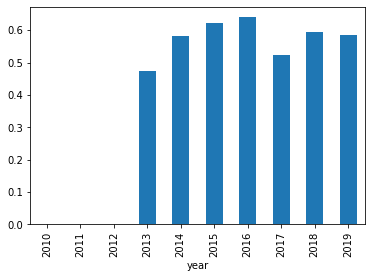

In [78]:
data.groupby(['year'])['gos_budget'].median().plot(kind='bar')
plt.show()

In [79]:
data.loc[data['gos_budget']==1.0,'title'].count()

17

Гос.поддержка в среднем не менее 54 %, минимальная гос.поддержка 4% ,максимальная 100%, таких фильмов аж 17. Всего государством было профинансированно 332 фильма. Больше всего государство поддерживало фильмы в 2016 году, ментше всего в 2013 году.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Для фильмов, у которых наличие проката в кинотеатрах неизвестно, значения в столбце box_office равно "не известен".
Создадим новый датафрейм сосотоящий только из фильмов, про которые известно,что они были в прокате и проанализируем его.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7467 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7467 non-null   object             
 1   puNumber               7467 non-null   int64              
 2   show_start_date        7467 non-null   datetime64[ns, UTC]
 3   type                   7467 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7467 non-null   object             
 6   director               7467 non-null   object             
 7   producer               7467 non-null   object             
 8   age_restriction        7467 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [81]:
data4=data[data['box_office']!=0]

In [82]:
data_groupy_year = data.groupby('year')['title'].count()
data_groupy_year

year
2010    984
2011    622
2012    593
2013    630
2014    806
2015    705
2016    817
2017    505
2018    879
2019    926
Name: title, dtype: int64

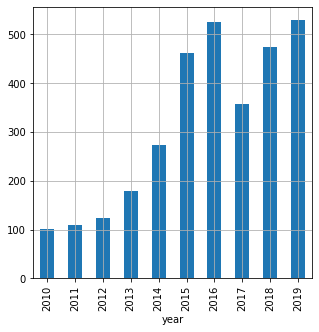

In [83]:
data4.groupby('year')['title'].count().plot(kind='bar',figsize=(5,5),grid=True)
plt.show()

Начиная с **2010** года наблюдается динамика росту выхода фильмов в кинотеатрах. Если в в **2010** году выходило чуть больше **100 фильмов**, то в **2016** уже бльше **500 фильмов**. В **2017** году наблюдается резкое подание выхода фильмов в прокат в кинотеатрах, а после снова возврат на прежний уровень.<br>
Одной из причин может быть то,что в **2017** году меньшее количество фильмов получилос гос.поддержку. 

In [84]:
round(len(data4)/len(data),2)

0.42

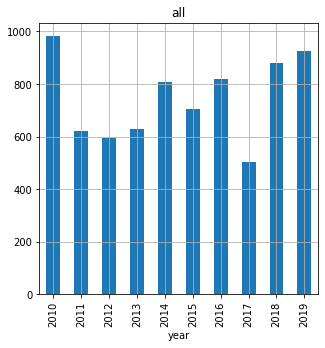

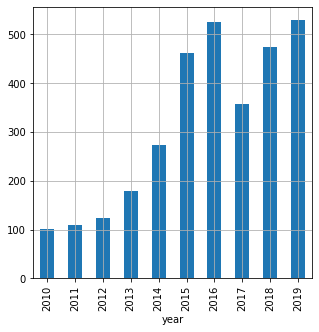

In [85]:
data.groupby('year')['title'].count().plot(kind='bar',figsize=(5,5),grid=True,title='all')
plt.show()
data4.groupby('year')['title'].count().plot(kind='bar',figsize=(5,5),grid=True)
plt.show()

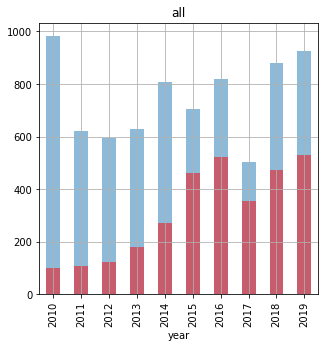

In [86]:
data.groupby('year')['title'].count().plot(kind='bar',figsize=(5,5),grid=True,title='all',  alpha=0.5)
data4.groupby('year')['title'].count().plot(kind='bar',figsize=(5,5),grid=True,  alpha=0.5, color="r")
plt.show()

**Построив два графика, представленные выше, видно,что информация о прокате фильмов в кинотеатрах полнее всего представлена в 2019 году. Менее всего в 2010 году.**

**42 %** фильмов с указанными данными о прокате фильма в кинотеатре.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

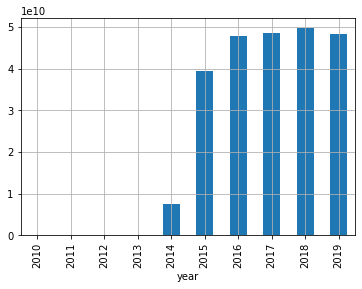

In [87]:
data4=data[data['box_office']!=0]
data4.groupby('year')['box_office'].sum().plot(kind='bar',grid=True)
plt.show()

С 2014 года по 2018 год идет наблюдается динамика на увеличение суммы сборов за прокат фильмов. В 2019 произошел спад ниже 2018 , минимальная - 2014, максимальная - 2018


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7467 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7467 non-null   object             
 1   puNumber               7467 non-null   int64              
 2   show_start_date        7467 non-null   datetime64[ns, UTC]
 3   type                   7467 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7467 non-null   object             
 6   director               7467 non-null   object             
 7   producer               7467 non-null   object             
 8   age_restriction        7467 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [89]:
data["box_office"].unique()

array([0.00000000e+00, 2.70000000e+03, 3.60000000e+02, ...,
       3.14379050e+06, 1.80017724e+07, 2.19569000e+05])

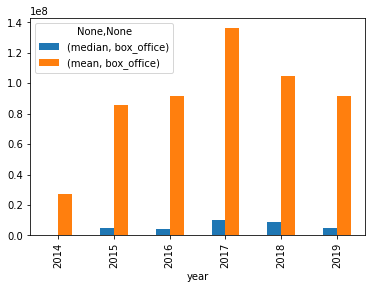

In [90]:
data4=data[data['box_office']!=0]
data4.query('year.between(2014,2019)').pivot_table(index='year',values='box_office',aggfunc=['median','mean']).plot(kind='bar')
plt.show()

In [91]:
data4['box_office'].astype('float').describe()

count    3.132000e+03
mean     7.711350e+07
std      2.412476e+08
min      4.000000e+01
25%      1.014762e+05
50%      2.413991e+06
75%      2.462174e+07
max      3.073569e+09
Name: box_office, dtype: float64

Огромные различия в подсчете медианной и средней суммы сборов. Все потому,что есть фильмы с суммой сборов больше 100 млн, а есть фильмы с нулём в этой графе. Половина фильмов с суммой сборов в два с небольшим миллиона.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

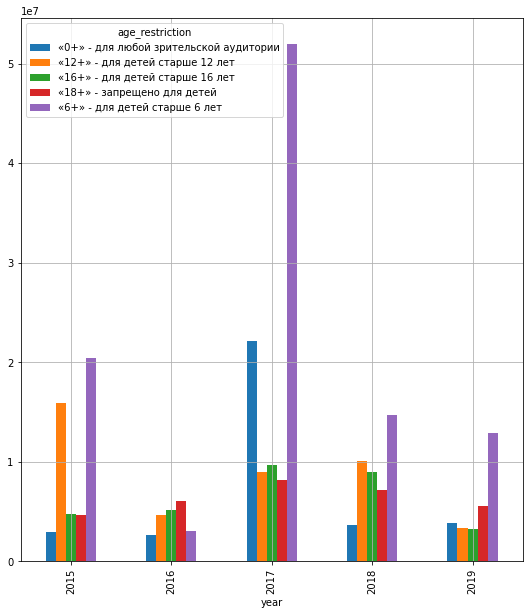

In [92]:

data4.query('year.between(2015,2019)').pivot_table(
    index='year',columns='age_restriction',values='box_office',aggfunc='median').plot(kind='bar',grid=True,figsize=(9,10))
plt.show()

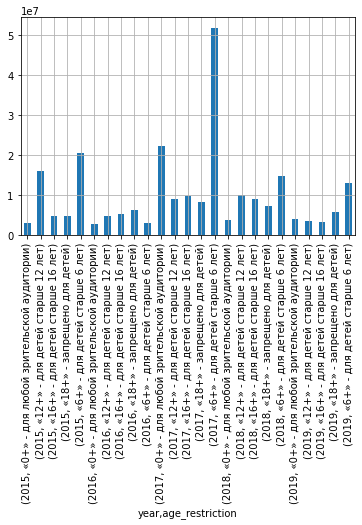

In [93]:
data4.query('year.between(2015,2019)').groupby(['year','age_restriction'])['box_office'].median().plot(kind='bar',grid=True)
plt.show()

Возрастное ограничение влияет на сумму сборов от проката фильмов. Больше всего собирают **"6+"-для детей старше 6 лет**. Видимо в эту категорию попадают такие картины, на которые ходят всей семьей. Особенно велика разница в сборах в этой категории и в других в **2017 году**. Возможно, в этом году выходило много семейных картин.<br>
Однако в **2016 году**  картина по сборам отличается. Больше всего собрали фильмы категории **"18+"- запрещено для детей**. Можно предположить,что в том году выходило мало семейных фильмов. В том году в целом очень маленькие сборы, по сравнению с другими годами.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

- Сколько выделялось денег на поддержку кино.

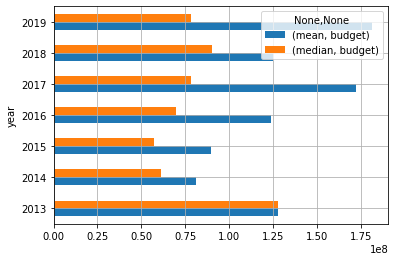

In [94]:
data3=data.loc[data['budget']>0]
data3.pivot_table(index='year',values='budget',aggfunc=['mean','median']).plot(kind='barh',grid=True)
plt.show()

In [95]:
data3.query('year==2013')['budget'].astype('float').describe()

count    2.000000e+00
mean     1.277177e+08
std      6.831471e+07
min      7.941190e+07
25%      1.035648e+08
50%      1.277177e+08
75%      1.518706e+08
max      1.760235e+08
Name: budget, dtype: float64

In [96]:
data3.query('year==2017')['budget'].astype('float').describe()

count    4.100000e+01
mean     1.721262e+08
std      2.044341e+08
min      1.816642e+07
25%      5.468750e+07
50%      7.809632e+07
75%      1.744644e+08
max      1.032906e+09
Name: budget, dtype: float64

Видно, что деньги выделялись только с 2013 года. Изучив средние и медианные значения, можно отметить,что в 2013 году эти значения равны, а в остальные годы отличаются. Можно предположить,что в 2013 году суммы на поддержку разных фильмов были близкие, тогда как в остальные годы какие-то фильмы получали мало денег, какие-то очень много.

- Сколько фильмов получили гос.поддержку.

In [97]:
round(len(data3)/len(data),2)    

0.04

Всего 4 процента фильмов получили гос.поддержку.

- Сколько фильмов из получивших гос.поддержку получили ее на только на возвратной основе.

In [98]:
len(data3.query('refundable_support!=0 and nonrefundable_support==0'))/len(data3)

0.02710843373493976

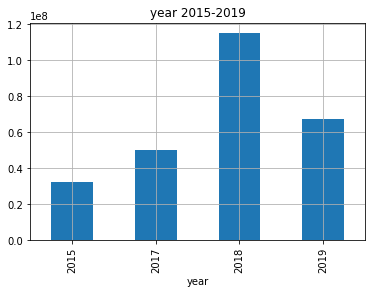

In [99]:
data3.query('refundable_support!=0 and nonrefundable_support==0').groupby('year')['refundable_support'].median().plot(
    kind='bar',grid=True,title='year 2015-2019')
plt.show()

 **Около 3 процентов фильмов из получивших гос.поддержку получили ее только на возвратной основе.Больше всего в 2018 году**.

- Сколько фильмов из получивших гос.поддержку получили ее на только на не возвратной основе.

In [100]:
round(len(data3.query('nonrefundable_support!=0 and refundable_support==0'))/len(data3),2)

0.67

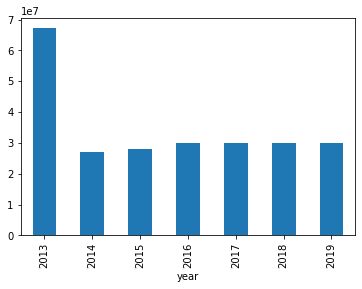

In [101]:
data3.query('nonrefundable_support!=0 and refundable_support==0').groupby('year')['nonrefundable_support'].median().plot(
    kind='bar')
plt.show()

 3 процентов фильмов из получивших гос.поддержку получили ее только на не возвратной основе. Больше всего в 2013 году.

- Рейтинг фильмов с гос.поддежкой по годам.

In [102]:
data3=data.loc[data['budget']>0]
data3['ratings'].describe()

count    332.000000
mean       5.730723
std        1.710008
min        0.000000
25%        5.200000
50%        6.100000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

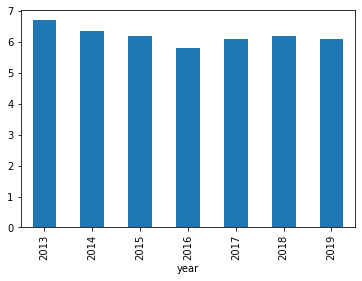

In [103]:
data3.groupby('year')['ratings'].median().plot(kind='bar')
plt.show()

Медианный рейтинг фильмов с гос.поддержкой 6 баллов, что является достаточно посредственным рейтингом. 

- Бюджет фильмов с гос.поддержкой по годам.

<AxesSubplot:xlabel='year'>

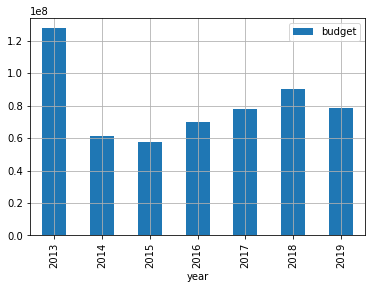

In [104]:
data3.pivot_table(values=['budget'],index='year',aggfunc='median').plot(
    kind='bar',grid=True)

/tmp/ipykernel_48/502283322.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data3.query('box_office>0').groupby('year')['box_office','budget'].median().plot(kind='bar',grid=True)


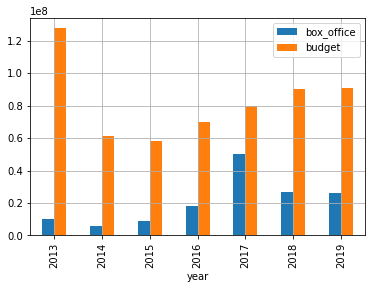

In [105]:
data3.query('box_office>0').groupby('year')['box_office','budget'].median().plot(kind='bar',grid=True)
plt.show()

Видно, что в период с 2013 по 2019 годы фильмы, которые получали гос.поддержку и по которым есть данные о прокате в кинотеатрах, финансово проваливались. В 2013 году картина совсем печальная. 

### Шаг 5. Напишите общий вывод

#### Исследовав полученные данные можно сделать следующие выводы:

- только у **42 %** фильмов  указанны данные о прокате фильма в кинотеатре.

- наиболее полно информация о прокате фильмов в кинотеатрах представлена в 2019 году. Меньше всего информации за 2010 год.

- начиная с **2010** года наблюдается динамика росту количества выходов фильмов в кинотеатрах. Если в в **2010** году выходило чуть больше **100 фильмов**, то в **2016** уже бльше **500 фильмов**.<br>
В **2017** году наблюдается резкое подание выхода фильмов в прокат в кинотеатрах, а после снова возврат на прежний уровень.<br>
Одной из причин может быть то,что в **2017** году меньшее количество фильмов получилос гос.поддержку. 

- С 2010 года по 2017 год идет наблюдается динамика на увеличение суммы сборов за прокат фильмов. С 2017 до 2019 падение более чем в два раза.

- Больше всего собирают **"6+"-для детей старше 6 лет**. Видимо в эту категорию попадают такие картины, на которые ходят всей семьей. Особенно велика разница в сборах в этой категории и в других в **2017 году**. Возможно, в этом году выходило много семейных картин.<br>
Однако в **2016 году**  картина по сборам отличается. Больше всего собрали фильмы категории **"18+"- запрещено для детей**. Можно предположить,что в том году выходило мало семейных фильмов. В том году в целом очень маленькие сборы, по сравнению с другими годами.

- Всего 4 процента фильмов получили гос.поддержку.

- Гос.поддержка в среднем за исследуемый период не менее 50 % бюджета, минимальная гос.поддержка 4% (фильм "За гранью реальности"),максимальная 100%, таких фильмов 17.<br> 
Всего государством было профинансированно 332 фильма. Больше всего государство поддерживало фильмы в 2016 году, меньше всего в 2013 году.

- гос.поддержка начала выделяться только с 2013 года. 

- Сильно разнятся средние и меддианные значения бюджета для всех годов,кроме 2013.<br>
Можно предположить,что в 2013 году суммы на поддержку разных фильмов были близкие, тогда как в остальные годы были сильные выбросы по суммам бюджета.

- Около 3 процентов фильмов из получивших гос.поддержку получили ее только на возвратной основе.Больше всего  таких было в 2018 году.

 - 65  процентов фильмов из получивших гос.поддержку получили ее только на не возвратной основе. Больше всего в 2013 году.
 
 - максимальный бюджет у фильмов с гос.поддержкой был в 2013 году. В остальные годы он примерно одинковый и составляет где-то половину от бюджета за 2013 год.
 
 - рейтинг фильмов с гос.поддержкой  где-то 6 баллов, зрителям такие фильмы видимо не очень нравятся.
 
